In [1]:
import gensim

/opt/anaconda3/envs/nlp21v0/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [3]:
#Import dataset
import pandas as pd
dfs10_user = pd.read_csv('/Users/lamga/OneDrive/IOD Lessons/Projects/Extract IG influencer dataset/dfs10user.csv')

In [4]:
dfs10_user.head()

,influencer,captions,tokens,no_hashtag,hashtag,Category,tier
0,00s_supermodels,#FashionEditorial Scan By Me #IngaSavits for E...,fashioneditorial scan by me ingasavits for ell...,#FashionEditorial Scan By Me #IngaSavits for E...,#FashionEditorial #IngaSavits #ELLE #magazine ...,fashion,Nano
1,0720_b,# # # # # Eternal Beauty # # # estinaofficial...,eternal beauty estinaofficial rosemont santama...,# # # # # Eternal Beauty # # # estinaofficial...,#ROSEMONT #santamarianovella #bodylotion #body...,fashion,Micro
2,0821_me,X 30 httpwwwwemakepricecomdealadeal4079242 # ...,x 30 httpwwwwemakepricecomdealadeal4079242 ad ...,X 30 httpwwwwemakepricecomdealadeal4079242 # ...,#AD #ORT #oxfordreadingtree #Hmall #1 #EM #EM ...,food,Mid-tier
3,1000manerasdevestir,Vamos a por esta mini semana estrenando total ...,vamos a por esta mini semana estrenando total ...,Vamos a por esta mini semana estrenando total ...,#fashionblogger #1000manerasdevestir #adagatti...,fashion,Micro
4,100pintas,Mais um mood natalcio #coolkids #fashionkids #...,mais um mood natalcio coolkids fashionkids por...,Mais um mood natalcio #coolkids #fashionkids #...,#coolkids #fashionkids #portuguesebrands #kids...,family,Nano


In [5]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
dfs10_user['Labels'] = ord_enc.fit_transform(dfs10_user[['Category']])

In [6]:
#Check labels assigned
dfs10_user.groupby(['Category'])['Labels'].first()

Category
beauty     0.0
family     1.0
fashion    2.0
food       3.0
travel     4.0
Name: Labels, dtype: float64

In [7]:
import re
Xt = dfs10_user['tokens']
Xh = dfs10_user['hashtag'].apply(str).apply(lambda x: re.sub('#','',x))
y = dfs10_user['Labels']

In [8]:
Xt_w2v = Xt.apply(gensim.utils.simple_preprocess)

In [10]:
w2v_model = gensim.models.Word2Vec(Xt_w2v,
                                   window=5,
                                   min_count=2)

In [11]:
w2v_model.build_vocab(Xt_w2v)

In [12]:
w2v_model.epochs

5

In [13]:
w2v_model.corpus_count

23374

In [15]:
w2v_model.save('./word2vec_vocab')

In [16]:
words = w2v_model.wv.index_to_key
words

['the',
 'to',
 'and',
 'in',
 'of',
 'my',
 'you',
 'it',
 'for',
 'this',
 'is',
 'with',
 'on',
 'so',
 'that',
 'me',
 'your',
 'all',
 'are',
 'have',
 'we',
 'be',
 'love',
 'at',
 'but',
 'from',
 'day',
 'wa',
 'im',
 'like',
 'one',
 'up',
 'out',
 'just',
 'time',
 'our',
 'by',
 'can',
 'what',
 'get',
 'or',
 'new',
 'not',
 'more',
 'when',
 'about',
 'do',
 'if',
 'happy',
 'some',
 'today',
 'how',
 'make',
 'year',
 'been',
 'will',
 'an',
 'look',
 'these',
 'life',
 'know',
 'now',
 'little',
 'they',
 'had',
 'link',
 'week',
 'here',
 'there',
 'good',
 'ha',
 'see',
 'go',
 'ive',
 'who',
 'thing',
 'dont',
 'back',
 'much',
 'them',
 'am',
 'off',
 'ad',
 'weekend',
 'no',
 'over',
 'her',
 'photo',
 'their',
 'friend',
 'because',
 'best',
 'last',
 'beautiful',
 'also',
 'bio',
 'way',
 'want',
 'always',
 'favorite',
 'were',
 'blog',
 'feel',
 'food',
 'fashion',
 'first',
 'got',
 'amazing',
 'ootd',
 'only',
 'cant',
 'recipe',
 'summer',
 'he',
 'take',
 't

In [17]:
#Illustrate vector
w2v_model.wv['ad']

array([-2.85645676e+00, -2.06507921e+00, -1.99185407e+00, -9.32547987e-01,
        2.19298410e+00,  2.60092306e+00, -1.20027041e+00, -2.10276151e+00,
        6.27948105e-01, -1.27237126e-01, -1.05390811e+00, -1.16855681e+00,
       -1.12786114e+00, -3.92225885e+00,  1.02343166e+00,  3.74751300e-01,
        1.47092664e+00, -3.73983681e-01, -2.14512038e+00,  9.99272704e-01,
       -8.90901506e-01, -1.50247335e+00,  1.65860939e+00, -1.46221888e+00,
        1.13204885e-02, -3.74461681e-01,  1.06921732e+00,  1.35305846e+00,
        2.14374140e-01, -1.73747408e+00, -1.68645456e-01,  9.39041078e-01,
        1.06759763e+00,  1.83706775e-01, -1.94377875e+00,  1.05635726e+00,
       -7.39542544e-01,  2.79736972e+00,  8.64543617e-01,  1.86842716e+00,
       -9.97333288e-01, -2.36768532e+00, -5.34463048e-01,  7.38409579e-01,
       -1.07752860e+00, -1.03183925e+00, -1.40632689e+00,  1.77058709e+00,
        5.32771468e-01, -1.10093248e+00, -1.16425359e+00,  2.46857405e+00,
       -2.81537175e+00,  

In [18]:
w2v_model.wv.most_similar('ad')

[('sponsored', 0.5620535016059875),
 ('paulhewitt', 0.529273271560669),
 ('getanchored', 0.5103979706764221),
 ('advertisement', 0.47711697220802307),
 ('collaboration', 0.437879353761673),
 ('order', 0.43179696798324585),
 ('gifted', 0.4118589460849762),
 ('wondernation', 0.40075522661209106),
 ('discount', 0.39749518036842346),
 ('sp', 0.39433106780052185)]

In [19]:
def document_vector(word2vec_model, doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc if word in word2vec_model.wv.index_to_key]
    return np.mean(word2vec_model.wv[doc], axis=0)

# Our earlier preprocessing was done when we were dealing only with word vectors
# Here, we need each document to remain a document 
def preprocess(text):
    text = text.lower()
    doc = word_tokenize(text)
    doc = [word for word in doc if word not in stop_words]
    doc = [word for word in doc if word.isalpha()] 
    return doc

# Function that will help us drop documents that have no word vectors in word2vec
def has_vector_representation(word2vec_model, doc):
    """check if at least one word of the document is in the
    word2vec dictionary"""
    return not all(word not in word2vec_model.wv.index_to_key for word in doc)

# Filter out documents
def filter_docs(corpus, texts, condition_on_doc):
    """
    Filter corpus and texts given the function condition_on_doc which takes a doc. The document doc is kept if condition_on_doc(doc) is true.
    """
    number_of_docs = len(corpus)

    if texts is not None:
        texts = [text for (text, doc) in zip(texts, corpus)
                 if condition_on_doc(doc)]

    corpus = [doc for doc in corpus if condition_on_doc(doc)]

    print("{} docs removed".format(number_of_docs - len(corpus)))

    return (corpus, texts)

In [20]:
#Take only 10 related vectors
vectors = []
for word in words:
    vectors.append(w2v_model.wv[word][:10])

In [21]:
# Create a list of strings, one for each collection of hashtags
tokens_list = [tokens for tokens in Xt_w2v]
tokens_list[:2]

[['scan',
  'by',
  'me',
  'ingasavits',
  'for',
  'elle',
  'china',
  'september',
  'elle',
  'magazine',
  'ellechina',
  'editorial',
  'supermodel',
  'topmodel',
  'iconmodels',
  'highfashion',
  'throwback',
  'flashback',
  'runway',
  'scan',
  'by',
  'me',
  'valentino',
  'fallwinter',
  'model',
  'irinabondarenko',
  'karolinakurkova',
  'valentino',
  'readytowear',
  'runwayshow',
  'fashionshow',
  'supermodel',
  'topmodel',
  'iconmodels',
  'highfashion',
  'tb',
  'fb',
  'throwback',
  'flashback',
  'classic',
  'beauty',
  'czechmodel',
  'sfashion',
  'runway',
  'claudiaschiffer',
  'balmain',
  'springsummer',
  'balmain',
  'runway',
  'eugeniavolodina',
  'byblos',
  'springsummer',
  'byblos',
  'runwayshow',
  'fashionshow',
  'supermodel',
  'topmodel',
  'iconmodels',
  'highfashion',
  'tb',
  'fb',
  'throwback',
  'flashback',
  'classic',
  'beauty',
  'sfashion',
  'russianmodel',
  'runway',
  'picture',
  'credit',
  'marpercuov',
  'aa',
  '

In [22]:
# Remove docs that don't include any words in W2V's vocab
corpus, titles_list = filter_docs(tokens_list, Xt_w2v, lambda doc: has_vector_representation(w2v_model, doc))

25 docs removed


In [25]:
#find which documents are dropped
drop_index = []
j = 0
for i in range(len(tokens_list)): 
    if tokens_list[i]!=titles_list[i-j]:
        drop_index.append(i)
        j += 1
drop_index

[510,
 612,
 2854,
 4071,
 5209,
 5329,
 6132,
 7476,
 8801,
 10314,
 10339,
 13219,
 13632,
 13855,
 14296,
 15152,
 15602,
 15802,
 17104,
 17569,
 17887,
 18443,
 18679,
 19276,
 23143]

In [26]:
#dropped same index from y
y.drop(labels=drop_index, inplace=True)

In [50]:
y

0        2.0
1        2.0
2        3.0
3        2.0
4        1.0
        ... 
23369    2.0
23370    2.0
23371    2.0
23372    2.0
23373    0.0
Name: Labels, Length: 23349, dtype: float64

In [27]:
# Filter out any empty docs
corpus, titles_list = filter_docs(corpus, titles_list, lambda doc: (len(doc) != 0))

0 docs removed


In [29]:
import numpy as np
x = []
for doc in corpus: # append the vector for each document
    x.append(document_vector(w2v_model, doc))
    
Xt_w2v_np = np.array(x) # list to array

In [41]:
from sklearn.manifold import TSNE
# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Again use only 400 rows to shorten processing ti me
tsne_features = tsne.fit_transform(Xt_w2v_np)
tsne_features.shape

(23349, 2)

In [46]:
tsne_features[:,1]

array([-13.985698 ,  -7.535285 ,  -6.685419 , ...,   7.517609 ,
        -1.4091042,  -9.691453 ], dtype=float32)

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

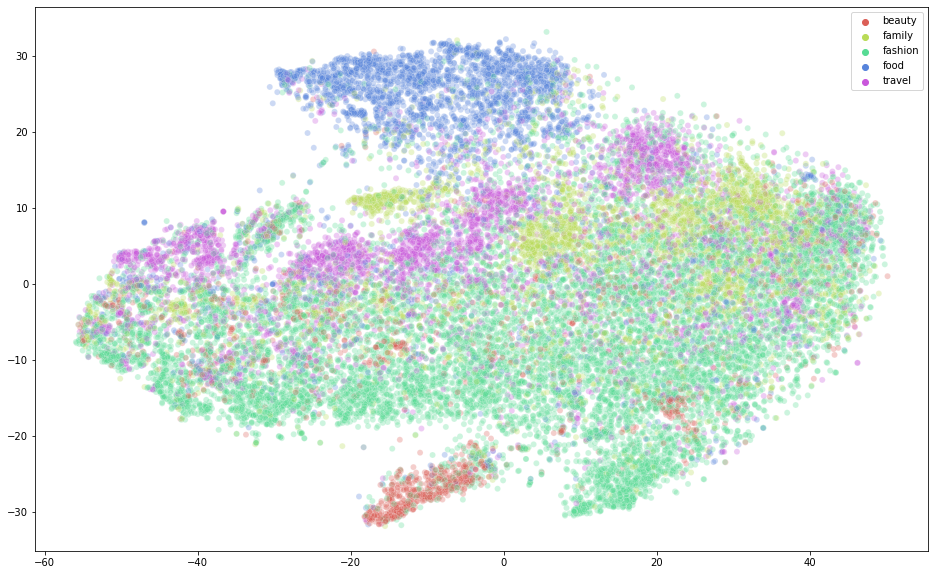

In [57]:
plt.figure(figsize=(16,10))
ax = sns.scatterplot(x=tsne_features[:, 0], y=tsne_features[:, 1], palette=sns.color_palette('hls',5),hue=y, alpha = 0.3)
handles, labels = ax.get_legend_handles_labels()
categories = ['beauty', 'family', 'fashion', 'food', 'travel']
ax.legend(handles,categories)